In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uwbLCWSnHV2geuphu3jv")
project = rf.workspace("deneme-nq1dn").project("football-yxg4a-v1hor")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-1 in yolov8:: 100%|██████████| 5780/5780 [00:01<00:00, 5734.77it/s]


# Task
Roboflow'dan alınan veri setini kullanarak early stopping özellikli bir YOLOv8 modeli kurun, test edin ve kaydedin.

## Ortam kurulumu

### Subtask:
Ultralytics kütüphanesini yükleyin.


**Reasoning**:
Install the ultralytics library using pip.



In [2]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.0 MB/s eta 0:00:00


## Model eğitimi

### Subtask:
Roboflow veri setini kullanarak YOLOv8 modelini early stopping ile eğitin.


**Reasoning**:
Import the YOLO class from ultralytics and train the model with early stopping on the downloaded dataset.



In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)

# Train the model
model.train(data='/content/football-1/data.yaml', epochs=50, imgsz=640, patience=10)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.211 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79856483df40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Kaydedilmiş Modeli Test Etme

### Subtask:
Kaydedilmiş modeli belirli bir görsel üzerinde test edin.

**Reasoning**:
Load the saved model and run inference on the specified image.


image 1/1 /content/real.jpeg: 384x640 4 players, 81.7ms
Speed: 2.3ms preprocess, 81.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


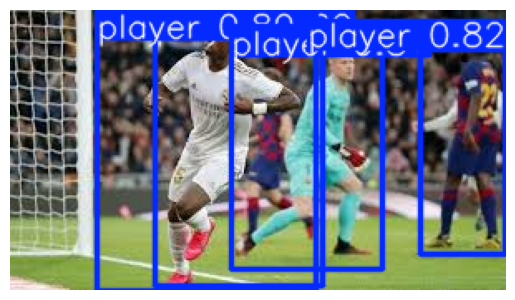

In [7]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt # Import matplotlib

# Load the saved model
saved_model = YOLO('/content/yolov8_football_early_stopping.pt')

# Run inference on the image
results = saved_model('real.jpeg')

# Display the results using matplotlib
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im) # Use matplotlib to display the image
    plt.axis('off') # Hide axes
    plt.show() # Show the plot

**Reasoning**:
Save the trained model to a file.

In [5]:
# Save the trained model
model.save('yolov8_football_early_stopping.pt')

## Model Kaydetme

### Subtask:
Eğitilmiş modeli kaydedin.

## Model Testi

### Subtask:
Eğitilmiş modeli test veri seti üzerinde değerlendirin.

**Reasoning**:
Evaluate the trained model on the test dataset using the `val()` method.

In [4]:
# Evaluate the model on the test dataset
results = model.val()

Ultralytics 8.3.211 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 678.0±137.2 MB/s, size: 40.4 KB)
val: Scanning /content/football-1/valid/labels.cache... 241 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 241/241 477.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 3.0it/s 5.3s
                   all        241       2261      0.963      0.941      0.967      0.628
Speed: 1.4ms preprocess, 10.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/runs/detect/val
